 # Importing libraries

In [1]:
import numpy as np
import pandas as pd                             
from pandas import DataFrame
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Storing dataset into dataframe

In [2]:
df=pd.read_excel('train.xlsx')  

In [3]:
df.head()

,EmployeeNumber,Age,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,1,41,Travel_Rarely,Sales,2,Life Sciences,Female,2,Sales Executive,4,Single,5993,8,Yes,11,3,8,6,0,Yes
1,2,49,Travel_Frequently,Research & Development,1,Life Sciences,Male,2,Research Scientist,2,Married,5130,1,No,23,4,10,10,1,No
2,4,37,Travel_Rarely,Research & Development,2,Other,Male,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,7,0,0,Yes
3,5,33,Travel_Frequently,Research & Development,4,Life Sciences,Female,1,Research Scientist,3,Married,2909,1,Yes,11,3,8,8,3,No
4,7,27,Travel_Rarely,Research & Development,1,Medical,Male,1,Laboratory Technician,2,Married,3468,9,No,12,3,6,2,2,No


# Checking Size of Dataset

In [4]:
df.shape

(999, 20)

In [5]:
df.size

19980

In [6]:
df[1:-2].describe()

,EmployeeNumber,Age,Education,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,688.606426,37.004016,2.869478,2.095382,2.768072,6624.493976,2.690763,15.202811,3.154618,11.413655,7.124498,2.235944
std,404.735109,9.422734,1.029725,1.139487,1.097931,4838.759827,2.529177,3.659782,0.361722,8.013028,6.353772,3.304261
min,2.000000,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000
25%,341.750000,30.000000,2.000000,1.000000,2.000000,2868.000000,1.000000,12.000000,3.000000,6.000000,3.000000,0.000000
50%,676.000000,36.000000,3.000000,2.000000,3.000000,4936.000000,2.000000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,1036.250000,43.000000,4.000000,3.000000,4.000000,8723.000000,4.000000,18.000000,3.000000,16.000000,9.000000,3.000000
max,1403.000000,60.000000,5.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,40.000000,15.000000


# Data Preprocessing

In [7]:
df.isnull()                                                     #checking for any null values

,EmployeeNumber,Age,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.duplicated()                                                  #checking for any duplicate

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

# Outlier Detection

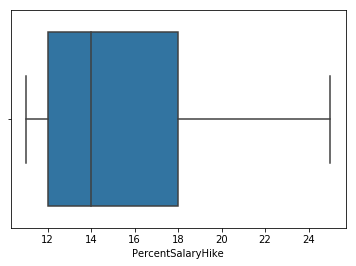

In [9]:
import seaborn as sns
sns.boxplot(x=df['PercentSalaryHike'])

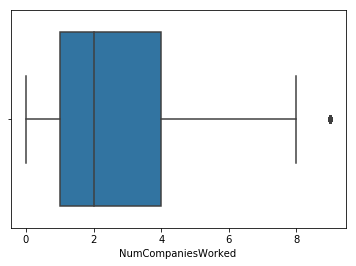

In [10]:
sns.boxplot(x=df['NumCompaniesWorked'])

In [11]:
df=df[:10]

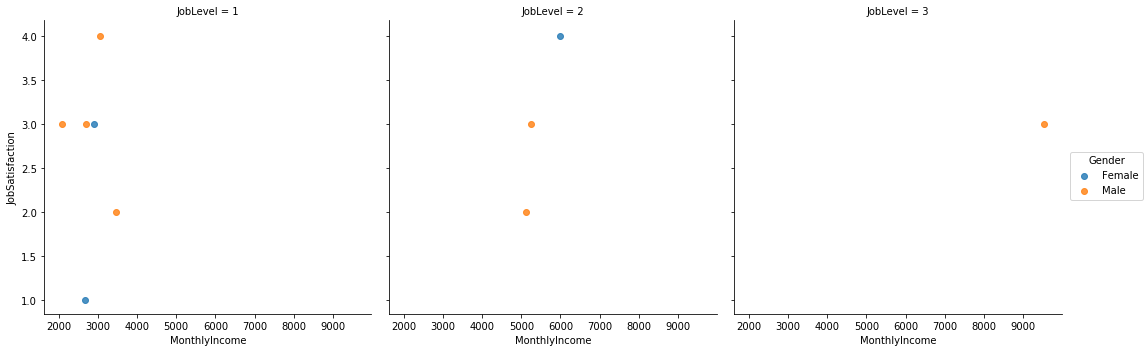

In [12]:
sns.lmplot("MonthlyIncome", "JobSatisfaction", data=df,hue="Gender", fit_reg=False, col='JobLevel', col_wrap=3)


# Line Graph

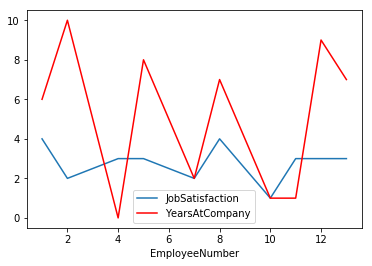

In [13]:
ax = plt.gca()

df.plot(kind='line',x='EmployeeNumber',y='JobSatisfaction',ax=ax)
df.plot(kind='line',x='EmployeeNumber',y='YearsAtCompany', color='red', ax=ax)

plt.show()

# Bar Graphs

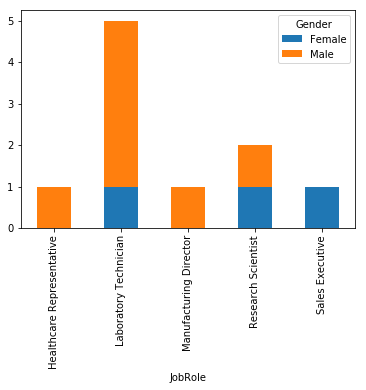

In [14]:
df.groupby(['JobRole','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

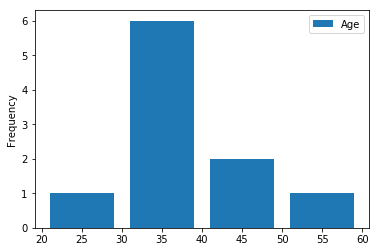

In [15]:
df[['Age']].plot(kind='hist',bins=[20,30,40,50,60],rwidth=0.8)
plt.show()

# Corelation Heatmap

In [16]:
df=DataFrame(df, columns= ['MonthlyIncome', 'TotalWorkingYears','PerformanceRating'])

In [17]:
df.corr()

,MonthlyIncome,TotalWorkingYears,PerformanceRating
MonthlyIncome,1.000000,0.347967,0.276493
TotalWorkingYears,0.347967,1.000000,-0.093598
PerformanceRating,0.276493,-0.093598,1.000000


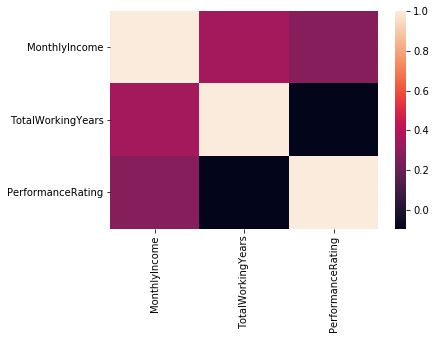

In [18]:
sns.heatmap(df.corr())